# Intro to Simple Linear Regression

We will start with loading data using wget.

-O tells the name of the output document.

After this we specify the name of the output document. And then add the path.

Read more about wget [here](https://www.scrapingbee.com/blog/python-wget/).

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [ ]:
!wget -O FuelConsumption.csv https://docs.google.com/spreadsheets/d/e/2PACX-1vSbBNJTtHj02WH-bK-J94kIk0Z4i1mSVBwmLGO9CQl7YTCjRAK2NyJ8ssyu3Hevnkmqgr5LMpTkX_WU/pub?output=csv

--2024-02-26 20:49:44--  https://docs.google.com/spreadsheets/d/e/2PACX-1vSbBNJTtHj02WH-bK-J94kIk0Z4i1mSVBwmLGO9CQl7YTCjRAK2NyJ8ssyu3Hevnkmqgr5LMpTkX_WU/pub?output=csv
Resolving docs.google.com (docs.google.com)... 209.85.146.138, 209.85.146.100, 209.85.146.102, ...
Connecting to docs.google.com (docs.google.com)|209.85.146.138|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-04-54-sheets.googleusercontent.com/pub/54bogvaave6cua4cdnls17ksc4/059nnhtbofcn353cchfv4shh3s/1708980580000/105370558293935486109/*/e@2PACX-1vSbBNJTtHj02WH-bK-J94kIk0Z4i1mSVBwmLGO9CQl7YTCjRAK2NyJ8ssyu3Hevnkmqgr5LMpTkX_WU?output=csv [following]
--2024-02-26 20:49:44--  https://doc-04-54-sheets.googleusercontent.com/pub/54bogvaave6cua4cdnls17ksc4/059nnhtbofcn353cchfv4shh3s/1708980580000/105370558293935486109/*/e@2PACX-1vSbBNJTtHj02WH-bK-J94kIk0Z4i1mSVBwmLGO9CQl7YTCjRAK2NyJ8ssyu3Hevnkmqgr5LMpTkX_WU?output=csv
Resolving doc-04-54-sheets.googleusercontent.com (doc-0

**About the data:**

[Source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

model_year e.g. 2024

make e.g. Acura

model e.g. ILX

vehicle_class e.g. SUV

engine_size (L) e.g. 4.7

cylinders e.g 6

transmission e.g. A6

fuel_type
city_fuel FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9

highway_fuel
FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

combined_fuel
FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

combined_mpg COMBINED (miles/g)

co2_emissions
CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

co2_rating

smog_rating

To read in the data as a Pandas dataframe:

In [ ]:
df = pd.read_csv("FuelConsumption.csv")

df


,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,city_fuel,highway_fuel,combined_fuel,combined_mpg,co2_emissions,co2_rating,smog_rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4,AS8,Z,10.0,7.5,8.9,32,207,5,5
729,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4,AS8,Z,10.7,8.1,9.5,30,223,5,7
730,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5,5
731,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5,5


In [ ]:
mean=np.mean(df[["engine_size","cylinders","city_fuel"]])
mean

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


engine_size     3.078854
cylinders       5.525239
city_fuel      12.362892
dtype: float64

In [ ]:
df.iloc[[0]]

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,city_fuel,highway_fuel,combined_fuel,combined_mpg,co2_emissions,co2_rating,smog_rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7


In [ ]:
median=np.median(df[["engine_size","cylinders","city_fuel"]])
median

6.0

In [ ]:
std=np.std(df[["engine_size","cylinders","city_fuel"]])
std

engine_size    1.271195
cylinders      1.882200
city_fuel      3.405447
dtype: float64

In [ ]:
var=np.var(df[["engine_size","cylinders","city_fuel"]])
var

engine_size     1.615938
cylinders       3.542678
city_fuel      11.597068
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model_year     733 non-null    int64  
 1   make           733 non-null    object 
 2   model          733 non-null    object 
 3   vehicle_class  733 non-null    object 
 4   engine_size    733 non-null    float64
 5   cylinders      733 non-null    int64  
 6   transmission   733 non-null    object 
 7   fuel_type      733 non-null    object 
 8   city_fuel      733 non-null    float64
 9   highway_fuel   733 non-null    float64
 10  combined_fuel  733 non-null    float64
 11  combined_mpg   733 non-null    int64  
 12  co2_emissions  733 non-null    int64  
 13  co2_rating     733 non-null    int64  
 14  smog_rating    733 non-null    int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 86.0+ KB


In [ ]:
df.isna().sum()

model_year       0
make             0
model            0
vehicle_class    0
engine_size      0
cylinders        0
transmission     0
fuel_type        0
city_fuel        0
highway_fuel     0
combined_fuel    0
combined_mpg     0
co2_emissions    0
co2_rating       0
smog_rating      0
dtype: int64

In [ ]:
df[['model_year','engine_size']].describe()

,model_year,engine_size
count,733.0,733.000000
mean,2024.0,3.078854
std,0.0,1.272063
min,2024.0,1.200000
25%,2024.0,2.000000
50%,2024.0,2.900000
75%,2024.0,3.600000
max,2024.0,8.000000


In [ ]:
df.nunique()

model_year         1
make              39
model            585
vehicle_class     13
engine_size       33
cylinders          7
transmission      22
fuel_type          4
city_fuel        149
highway_fuel     106
combined_fuel    127
combined_mpg      44
co2_emissions    235
co2_rating         8
smog_rating        6
dtype: int64

In [ ]:
df[['fuel_type','transmission']].nunique()

fuel_type        4
transmission    22
dtype: int64

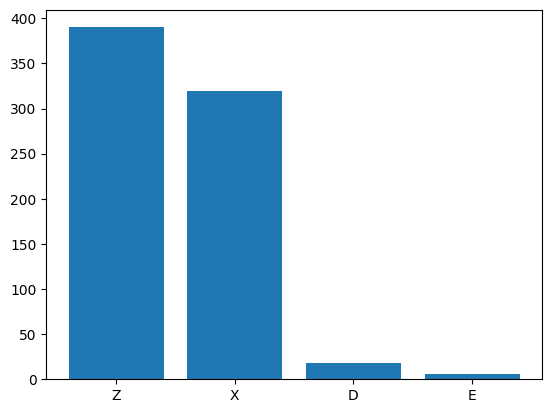

In [ ]:
data = df['fuel_type'].unique()
plt.bar(data,df['fuel_type'].value_counts())
plt.show()

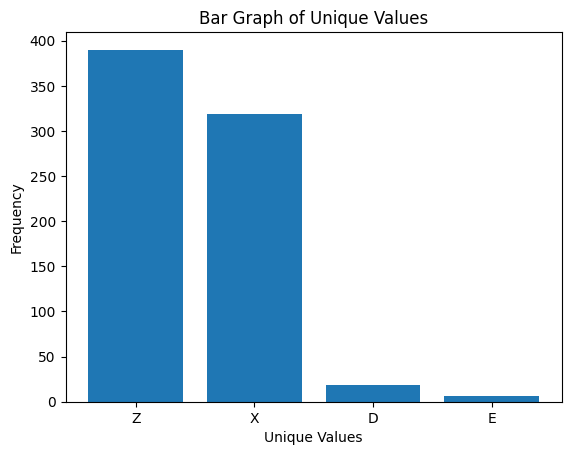

In [ ]:
import matplotlib.pyplot as plt

# Data for the bar graph
column_data = df['fuel_type']  # Replace 'column_name' with the actual column name from your dataset
unique_values = column_data.unique()

# Count the occurrences of each unique value
value_counts = column_data.value_counts()

# Creating the bar graph
plt.bar(unique_values, value_counts)

# Adding labels and title
plt.xlabel('Unique Values')
plt.ylabel('Frequency')
plt.title('Bar Graph of Unique Values')

# Displaying the graph
plt.show()

In [ ]:
df['fuel_type'].unique()

array(['Z', 'X', 'D', 'E'], dtype=object)

<ipython-input-19-5d0fb2eb025e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

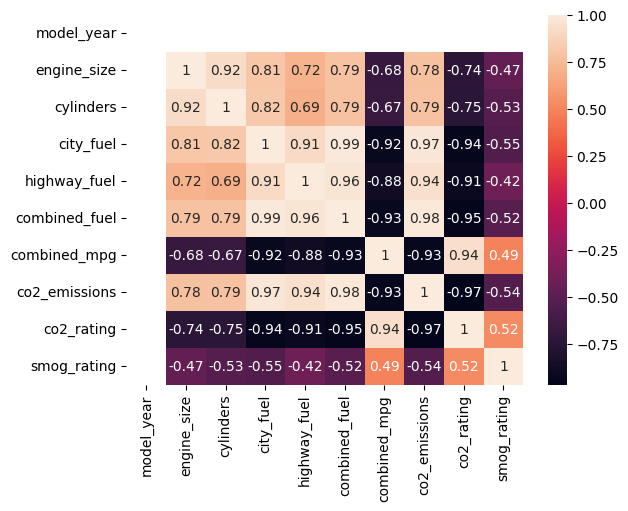

In [ ]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr, annot=True)

We want to train a simple linear regression where CO2 emissions are regressed on engine size.

Let's visualize through a scatter plot how the two are related in the data.

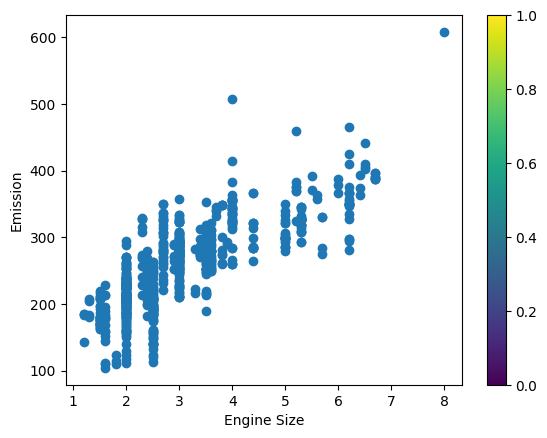

In [ ]:
plt.scatter(df.engine_size, df.co2_emissions)

plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.colorbar()
plt.show()

ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 733.

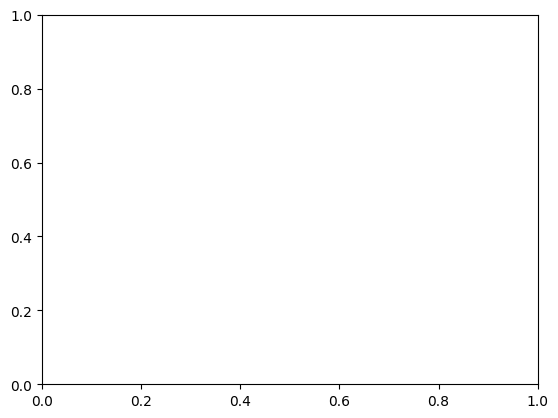

In [ ]:
import matplotlib.pyplot as plt

colors = ['red', 'green']  # Custom color sequence

plt.scatter(df.engine_size, df.co2_emissions, c=colors)

plt.xlabel("Engine Size")
plt.ylabel("Emission")

plt.show()

**Creating train and test sets**

To randomly divide instances into train and test sets, we will use the numpy function random.rand()

It takes as arguments the shape of the array to be generated which will consist of random numbers between 0 and 1 - see help!

In [ ]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

We will first create a Boolean array, bool, of the length of the dataset which will:

state True whenever the condition is true;

and False whenever it is false

In [ ]:
check = np.random.rand(len(df))
check.shape

(733,)

In [ ]:
bool = np.random.rand(len(df)) < 0.8   #is a Boolean array of random numbers between 0 and 1 of the length of df
bool.sum()  #this shows the number of times 'True' appears in the array called bool. These will be the training instances

591

In [ ]:
bool

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,

In [ ]:
#Let's check what proportion of instances will lie in the training set:
566/733

0.772169167803547

Now, let's create the train and test sets:

In [ ]:
train = df[bool]

test = df[~bool]

train

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,city_fuel,highway_fuel,combined_fuel,combined_mpg,co2_emissions,co2_rating,smog_rating
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
5,2024,Acura,RDX SH-AWD,Sport utility vehicle: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
6,2024,Acura,RDX SH-AWD A-SPEC,Sport utility vehicle: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,241,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2.0,4,AS8,Z,10.0,7.5,8.9,32,207,5,5
729,2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2.0,4,AS8,Z,10.7,8.1,9.5,30,223,5,7
730,2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,9.9,7.8,9.0,31,210,5,5
731,2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2.0,4,AS8,Z,10.6,8.3,9.6,29,226,5,5


In [ ]:
test

,model_year,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,city_fuel,highway_fuel,combined_fuel,combined_mpg,co2_emissions,co2_rating,smog_rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
10,2024,Alfa Romeo,Stelvio,Sport utility vehicle: Small,2.0,4,A8,Z,10.3,8.1,9.3,30,218,5,5
13,2024,Alfa Romeo,Tonale AWD,Sport utility vehicle: Small,2.0,4,A9,X,11.2,8.2,9.8,29,231,5,7
15,2024,Aston Martin,DBS V12,Minicompact,5.2,12,A8,Z,16.4,10.7,13.8,20,324,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,2024,Volkswagen,Jetta Comfortline/Highline,Compact,1.5,4,AS8,X,8.1,5.9,7.1,40,168,6,7
719,2024,Volkswagen,Jetta,Compact,1.5,4,M6,X,8.2,5.6,7.0,40,165,7,7
721,2024,Volkswagen,Jetta GLI,Compact,2.0,4,M6,X,9.8,6.7,8.4,34,198,6,7
722,2024,Volkswagen,Taos,Sport utility vehicle: Small,1.5,4,AS8,X,8.4,6.5,7.5,38,178,6,7


Before estimating the simple linear regression, we can also look at how engine size and emissions are related in the training set.

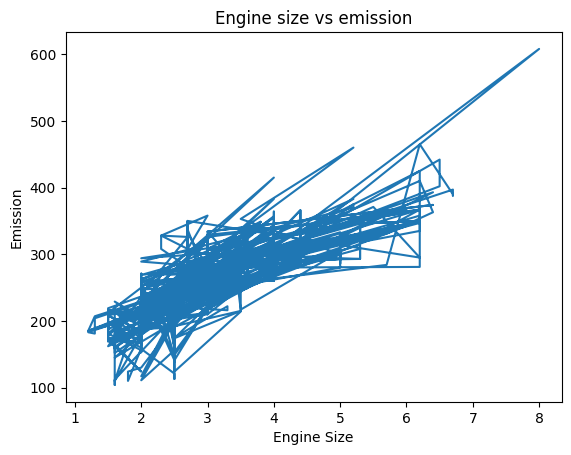

In [ ]:
plt.plot(train.engine_size, train.co2_emissions)

plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.title('Engine size vs emission')
plt.show()

The model!

We will use the scikit-learn package to use the linear regression model from it.

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

train_x = np.array(train[['engine_size']])
train_y = np.array(train[['co2_emissions']])

yhat=reg.fit(train_x, train_y)

# The coefficients
print ('Slope Coefficient: ', reg.coef_)
print ('Intercept: ',reg.intercept_)
#print(yhat.summary())
print(yhat.pvalues)

Slope Coefficient:  [[40.50432423]]
Intercept:  [134.29981463]


AttributeError: 'LinearRegression' object has no attribute 'pvalues'

In [ ]:
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm

reg = linear_model.LinearRegression()

train_x = np.array(train[['engine_size']])
train_y = np.array(train[['co2_emissions']])

yhat = reg.fit(train_x, train_y)

# The coefficients
print('Slope Coefficient: ', reg.coef_)
print('Intercept: ', reg.intercept_)

# Add a constant column to the input features
train_x = sm.add_constant(train_x)

# Fit the ordinary least squares (OLS) model
model = sm.OLS(train_y, train_x)
results = model.fit()

# Print the summary
print(results.summary())

# Get the p-values
print('P-values:')
print(results.pvalues)

Slope Coefficient:  [[40.50432423]]
Intercept:  [134.29981463]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     949.6
Date:                Sat, 24 Feb 2024   Prob (F-statistic):          6.53e-125
Time:                        21:58:58   Log-Likelihood:                -3018.9
No. Observations:                 591   AIC:                             6042.
Df Residuals:                     589   BIC:                             6050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [ ]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
train_x=np.asarray(train[['co2_rating']])
train_y=np.asarray(train[['smog_rating']])
reg.fit(train_x,train_y)  #it is fitting the model to learn the coefficients of model of regression equation
print('slope:', reg.coef_)
print('intercept',reg.intercept_)
train=sm.add_constant(train_x)
model=sm.OLS(train_y,train)
results=model.fit()
print(results.summary())

#print(reg.coeff)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

We can now plot the regression line on the test data to visualize how predictions are made.

In [ ]:
print(type(reg.coef_))

<class 'numpy.ndarray'>


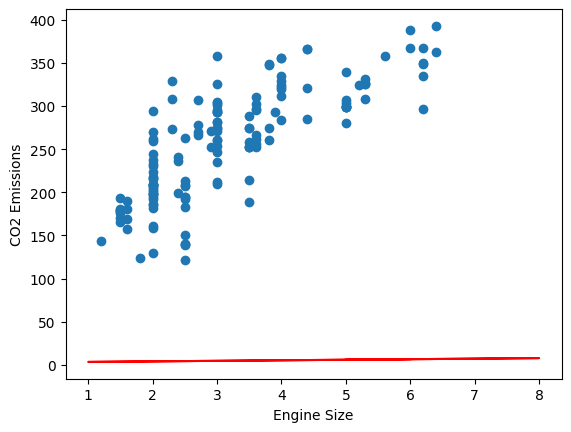

In [ ]:
plt.scatter(test.engine_size, test.co2_emissions)
plt.plot(train_x, reg.coef_[0][0]*train_x + reg.intercept_[0], color = "red")

plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")

plt.show()

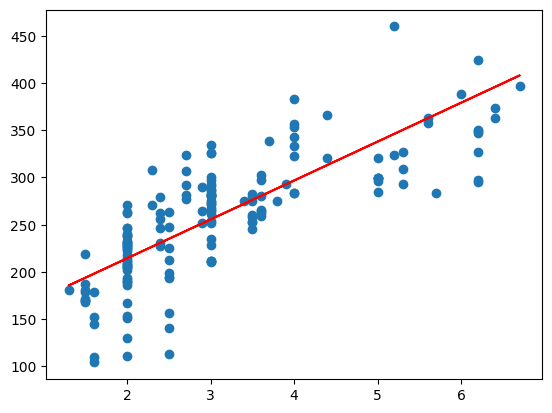

In [ ]:
test_x = np.asanyarray(test[['engine_size']])

y_hat = reg.predict(test_x)

plt.scatter(test.engine_size, test.co2_emissions)
plt.plot(test_x, y_hat, color = "red")

plt.show()

Now, to evaluate model performance. Let's use:

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

Root Mean Squared Error (RMSE).

R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0

In [ ]:
from sklearn.metrics import r2_score
from math import sqrt

test_x = np.asanyarray(test[['engine_size']])
test_y = np.asanyarray(test[['co2_emissions']])
y_hat = reg.predict(test_x)
print('r square',r2_score(test_y, y_hat))

#beta=estimate_coef(test_x,test_y)
#MAE:
print("Mean Absolute Error:")
print(np.mean(np.absolute(test_y - y_hat)))

#MSE:
print("Mean Squared Error:")
print(np.mean((test_y - y_hat)**2))

#RMSE:
print("Root Mean Squared Error:")
print(sqrt(np.mean((test_y - y_hat)**2)))

#R-squared:
print("R2 score:")
print(r2_score(test_y, y_hat))

r square -15.58802386090112
Mean Absolute Error:
252.7712025892393
Mean Squared Error:
67905.3138683362
Root Mean Squared Error:
260.5864805939406
R2 score:
-15.58802386090112
